In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np
import logging

In [3]:
#set up logging 
logging.basicConfig(level=logging.INFO,format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# load data sets 

In [4]:
sample = pd.read_csv('sample_submission.csv')
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv', parse_dates=['Date'])
train = pd.read_csv('train.csv', parse_dates=['Date'])

In [5]:
# Initial data exploration 
print(sample.head)
print(store.head)
print(test.head)
print(train.head)

<bound method NDFrame.head of           Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]>
<bound method NDFrame.head of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c              

In [6]:
logger.info('Datasets loded successfully')

2024-10-20 13:39:04,330 - INFO - Datasets loded successfully


# Handle missing values

In [7]:
logger.info('Filling missing values')

2024-10-20 13:39:04,339 - INFO - Filling missing values


In [8]:
# Handle missing values in store data 
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)
store['CompetitionOpenSinceMonth'].fillna(0,inplace=True)
store['CompetitionOpenSinceYear'].fillna(0,inplace=True)
store['Promo2SinceWeek'].fillna(0,inplace=True)
store['Promo2SinceYear'].fillna(0,inplace=True)
store['PromoInterval'].fillna(0,inplace=True)

In [9]:
# Handle missing values in train and test data 
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)
sample.fillna(0,inplace=True)

In [10]:
logger.info('Missing values filled')

2024-10-20 13:39:04,449 - INFO - Missing values filled


In [11]:
# Merge train and store data 
train = train.merge(store,on='Store',how= 'left')
test = test.merge(store, on='Store', how= 'left')

In [12]:
logger.info('Dataset merged succesfully')

2024-10-20 13:39:04,899 - INFO - Dataset merged succesfully


# Null values

In [13]:
#check for any remaining null values 
print(train.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [14]:
print(test.isnull().sum())

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [15]:
print(sample.isnull().sum())

Id       0
Sales    0
dtype: int64


# Data Overview

In [16]:
train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


In [17]:
test.describe()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41088,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,2015-08-24 12:00:00,0.854094,0.395833,0.443487,5082.126168,4.429907,1264.787383,0.580607,14.182243,1168.078271
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000,2410.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30816.250000,832.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000,6435.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000
std,11861.228267,320.274496,2.015481,NaN,0.353017,0.489035,0.496802,7218.274638,4.214484,969.984740,0.493466,16.177932,992.765386


In [18]:
sample.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [19]:
# check data type 
print(train.dtypes) 
print(test.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object
Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open              

In [20]:
# convert date columns to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [21]:
logger.info('Data cleaning completed.')

2024-10-20 13:39:06,103 - INFO - Data cleaning completed.


# Exploratory Data Analysys

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


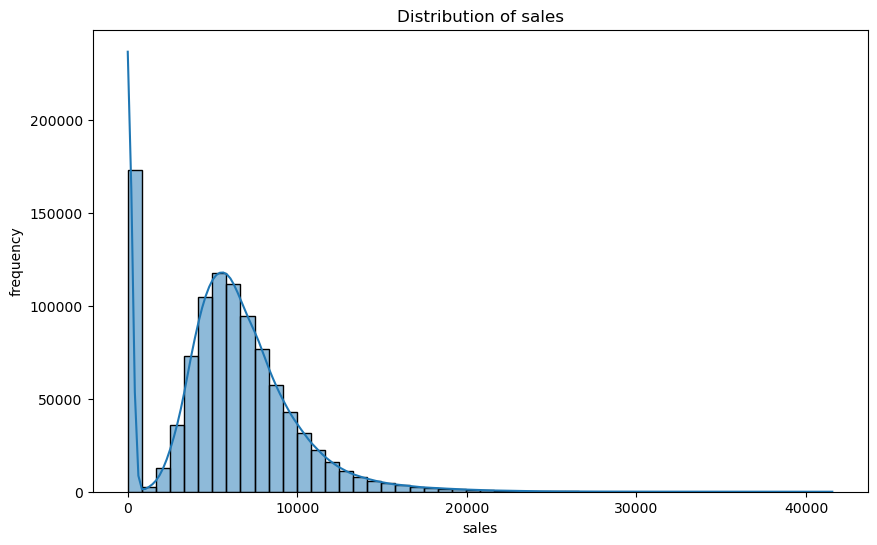

In [24]:
#Distribution of sales 
plt.figure(figsize=(10,6))
sns.histplot(train['Sales'],bins=50,kde=True)
plt.title('Distribution of sales')
plt.xlabel('sales')
plt.ylabel('frequency')
plt.show()

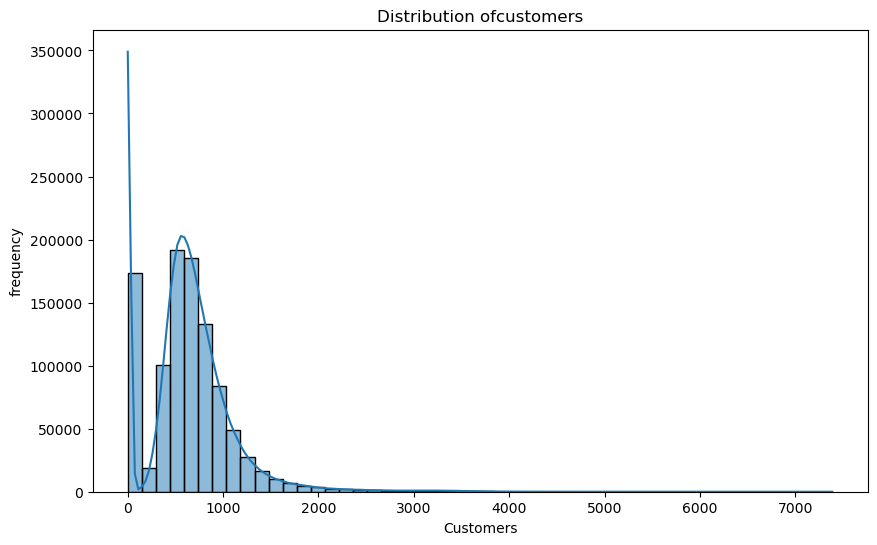

In [25]:
#Distribution of customers 
plt.figure(figsize=(10,6))
sns.histplot(train['Customers'],bins=50,kde=True)
plt.title('Distribution ofcustomers')
plt.xlabel('Customers')
plt.ylabel('frequency')
plt.show()

2024-10-20 13:39:36,819 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:39:37,549 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


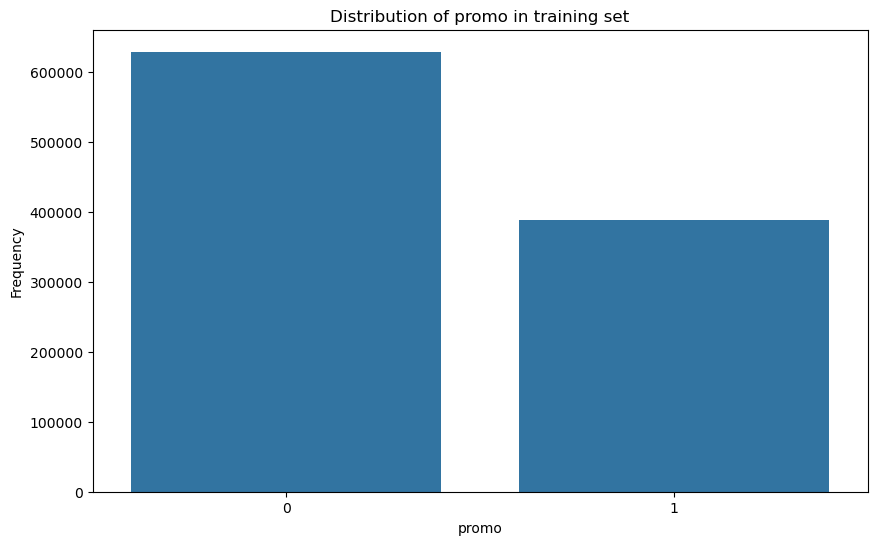

In [26]:
#distribution of promotion 
plt.figure(figsize=(10,6))
sns.countplot(x='Promo',data=train)
plt.title('Distribution of promo in training set')
plt.xlabel('promo')
plt.ylabel('Frequency')
plt.show()

In [27]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


2024-10-20 13:39:38,116 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:39:38,166 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


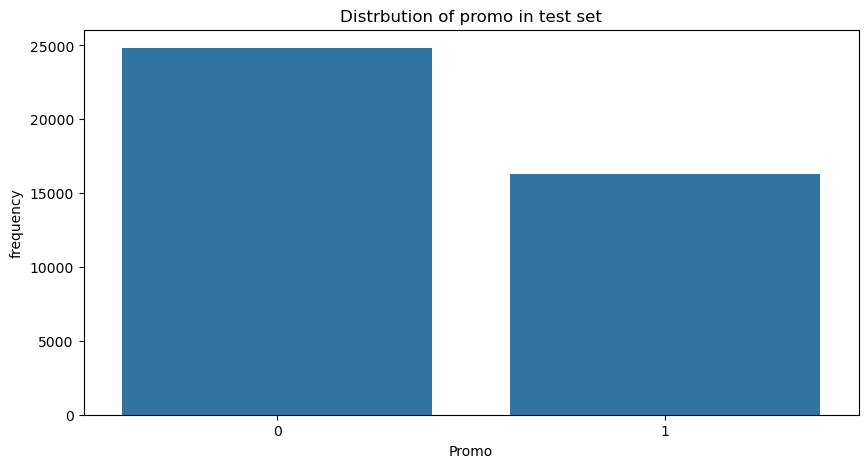

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Promo', data=test)
plt.title('Distrbution of promo in test set')
plt.xlabel('Promo')
plt.ylabel('frequency')
plt.show()

# Compare sales before, during and after holidays

In [29]:
# Adding new columns for analysis 
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.month
train['week'] = train['Date'].dt.isocalendar().week

In [30]:
#Check add columns
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Day,week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,7,7,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,7,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,7,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,7,7,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,7,7,7,31


In [31]:
#Check shape
train.shape

(1017209, 22)

# Sales beahavior arround holidays

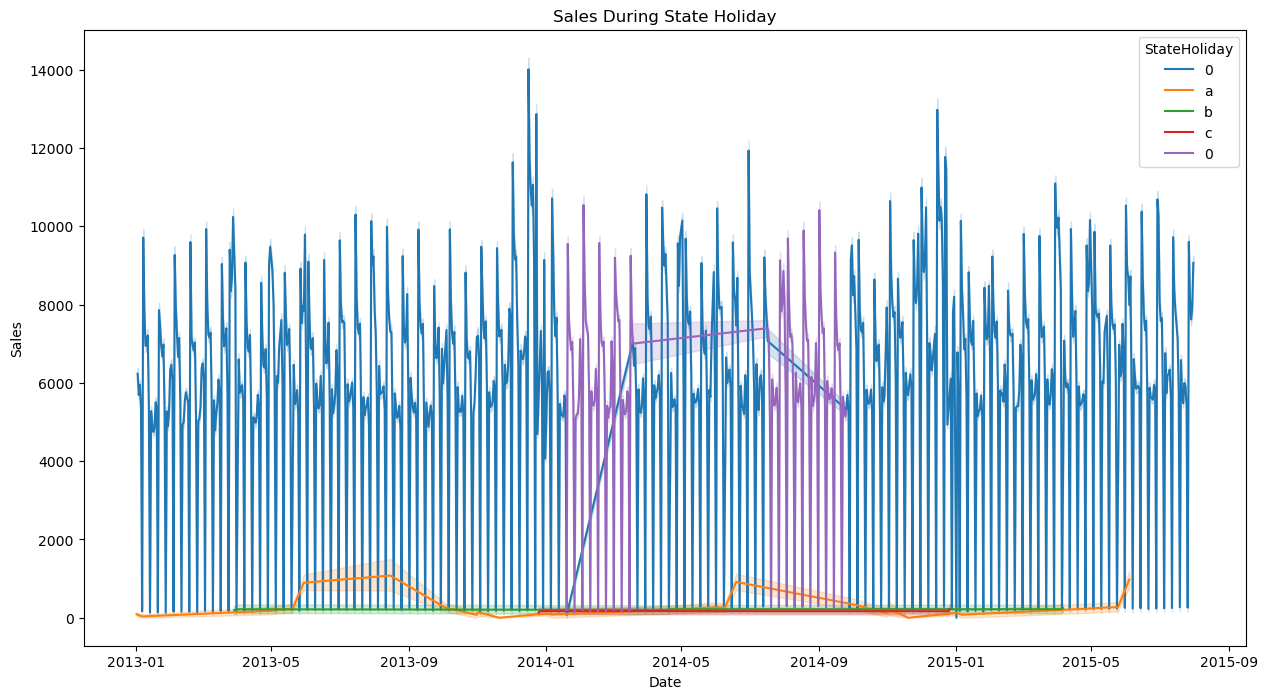

In [32]:
# Sales during state holiday
plt.figure(figsize=(15,8))
sns.lineplot(data= train, x='Date', y= 'Sales',hue='StateHoliday',palette='tab10')
plt.title('Sales During State Holiday')
plt.show()

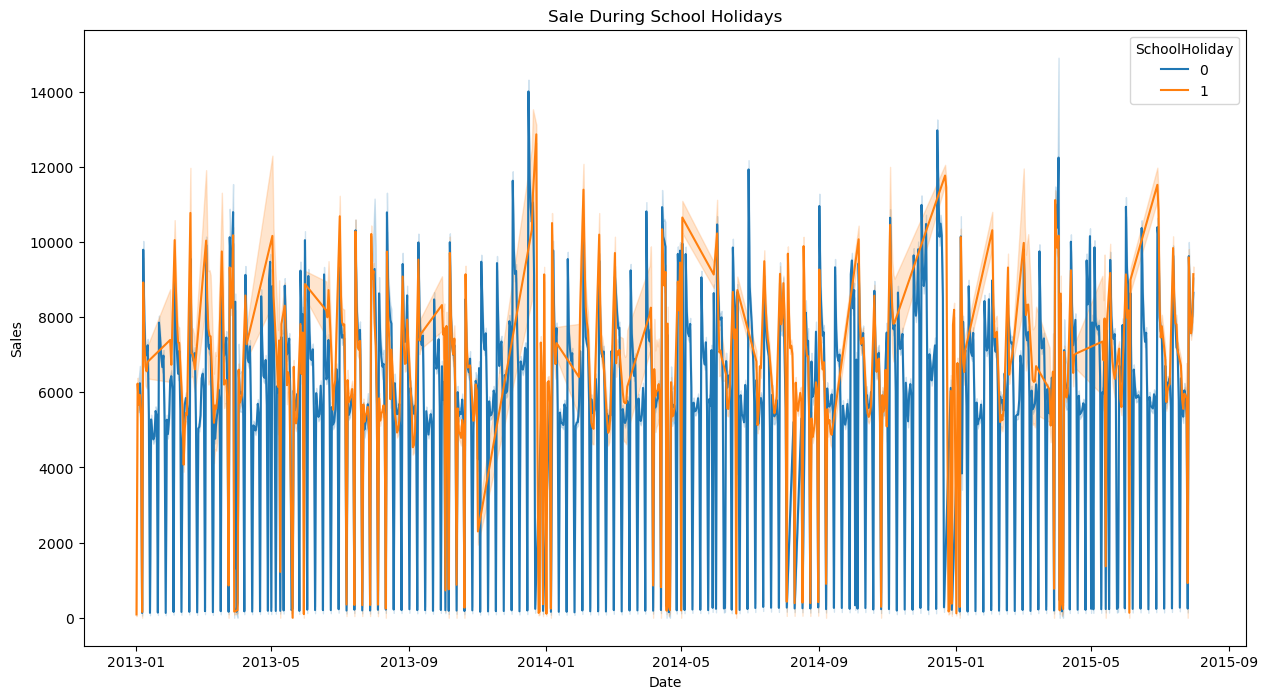

In [33]:
# Sale during school holidays 
plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='Date', y='Sales',hue='SchoolHoliday',palette='tab10')
plt.title('Sale During School Holidays')
plt.show()

# Seasonal purchage behavior 

Analyze seasonal purchage behavior (e.g., Monthly, weekly and Chrismas.) 

2024-10-20 13:40:59,691 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:40:59,699 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


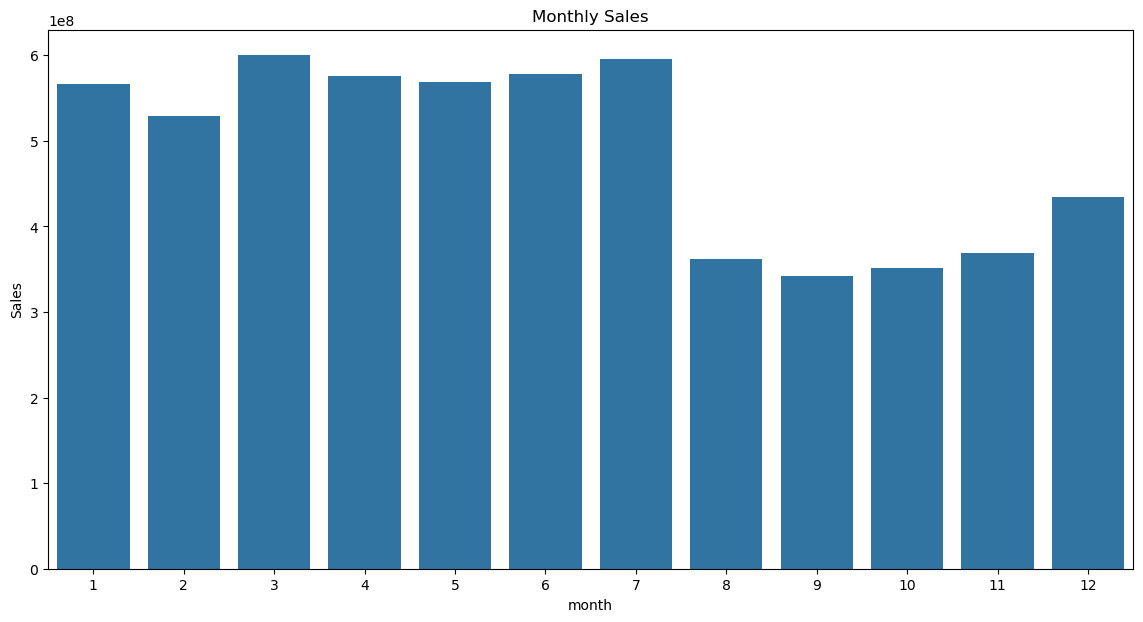

In [34]:
#Monthly Sales 
monthly_sales = train.groupby('month')['Sales'].sum().reset_index()
plt.figure(figsize=(14,7))
sns.barplot(data=monthly_sales,x='month',y='Sales')
plt.title('Monthly Sales')
plt.xlabel('month')
plt.ylabel('Sales')
plt.show()

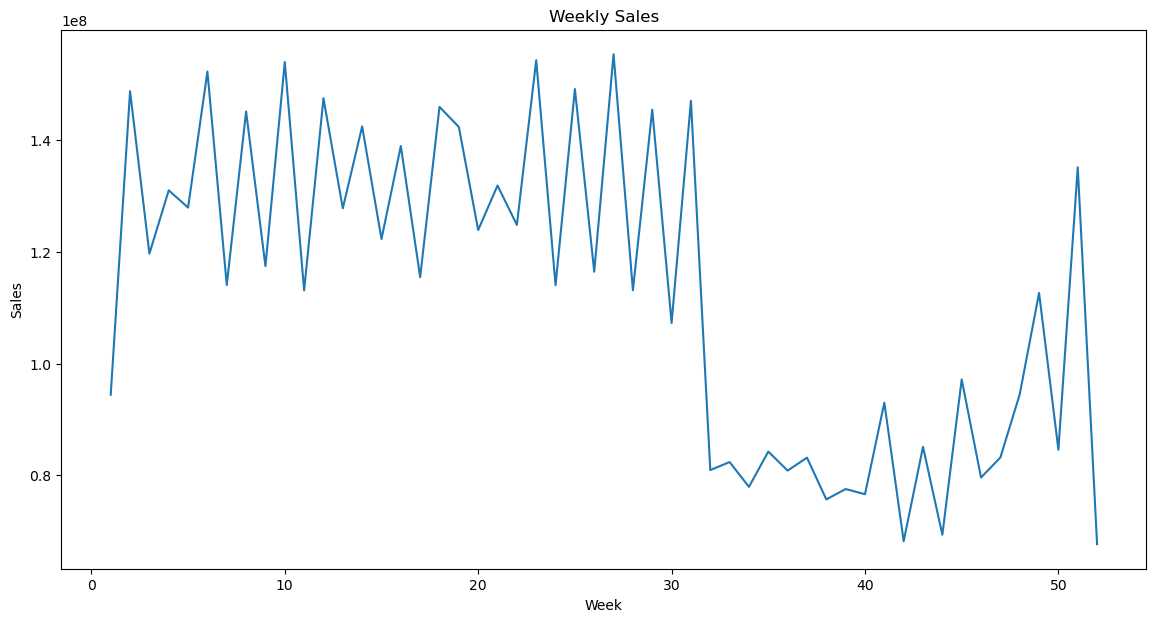

In [35]:
#Weekly sales 
weekly_sales = train.groupby('week')['Sales'].sum().reset_index()
plt.figure(figsize=(14,7))
sns.lineplot(data=weekly_sales, x='week', y='Sales')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [36]:
# Extracting christmas period sales 
christmas = train[(train['Date'] >= '2014-12-20') & (train['Date'] <= '2014-12-31')] 

In [37]:
christmas

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Day,week
236380,1,3,2014-12-31,2605,327,1,0,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,12,12,12,1
236381,2,3,2014-12-31,2269,252,1,0,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",12,12,12,1
236382,3,3,2014-12-31,3804,408,1,0,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12,12,12,1
236383,4,3,2014-12-31,10152,1311,1,0,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,12,12,12,1
236384,5,3,2014-12-31,1830,217,1,0,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,12,12,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247595,1111,6,2014-12-20,5288,390,1,0,0,0,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",12,12,12,51
247596,1112,6,2014-12-20,9548,828,1,0,0,0,c,...,4.0,2006.0,0,0.0,0.0,0,12,12,12,51
247597,1113,6,2014-12-20,8512,755,1,0,0,0,a,...,0.0,0.0,0,0.0,0.0,0,12,12,12,51
247598,1114,6,2014-12-20,26866,4009,1,0,0,0,a,...,0.0,0.0,0,0.0,0.0,0,12,12,12,51


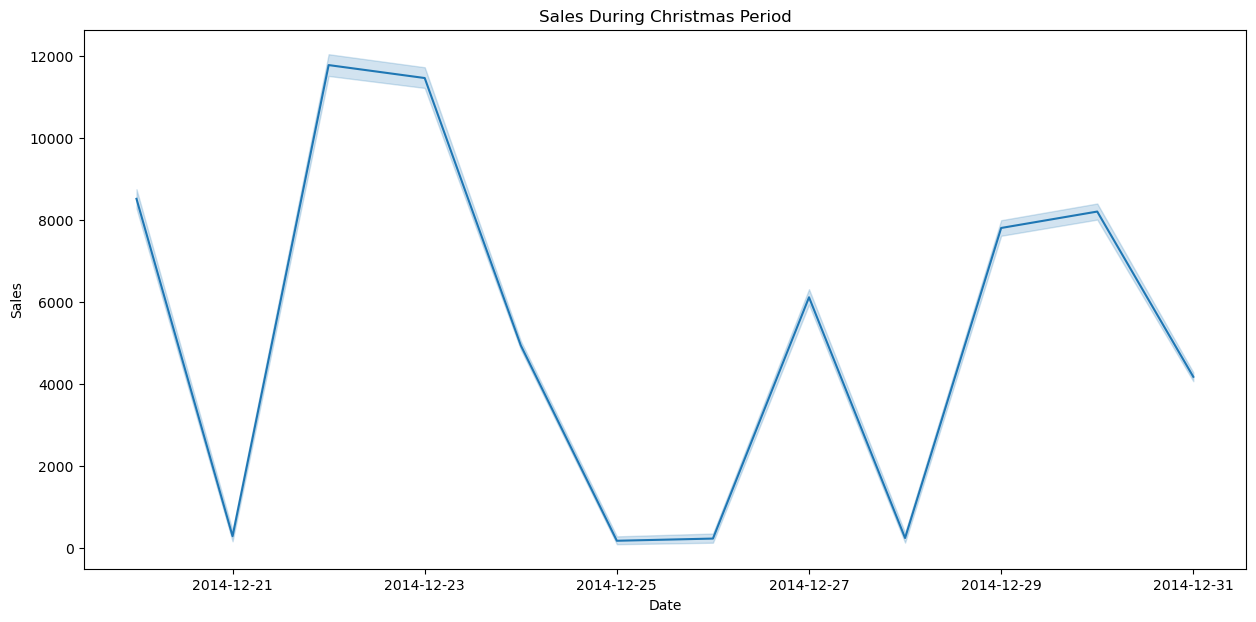

In [38]:

# Sales during christmas period 
plt.figure(figsize=(15,7))
sns.lineplot(data = christmas,x = 'Date', y = 'Sales')
plt.title('Sales During Christmas Period')
plt.show()

# Correlation between sales and customer 

Explore the correlation between sales and the number of customer

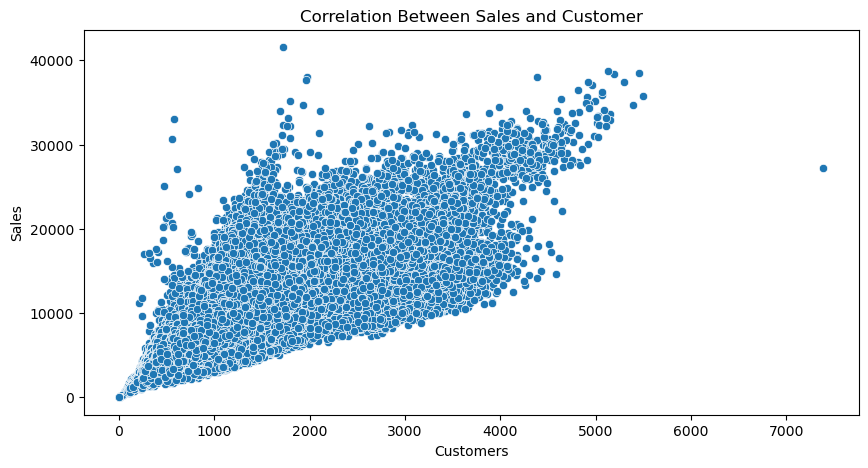

In [39]:
#Correlation between sales and customer 
plt.figure(figsize=(10,5))
sns.scatterplot(data= train, x= 'Customers', y= 'Sales')
plt.title('Correlation Between Sales and Customer')
plt.show()

In [40]:
correlation = train[['Customers', 'Sales']].corr()
print(correlation)

           Customers     Sales
Customers   1.000000  0.894711
Sales       0.894711  1.000000


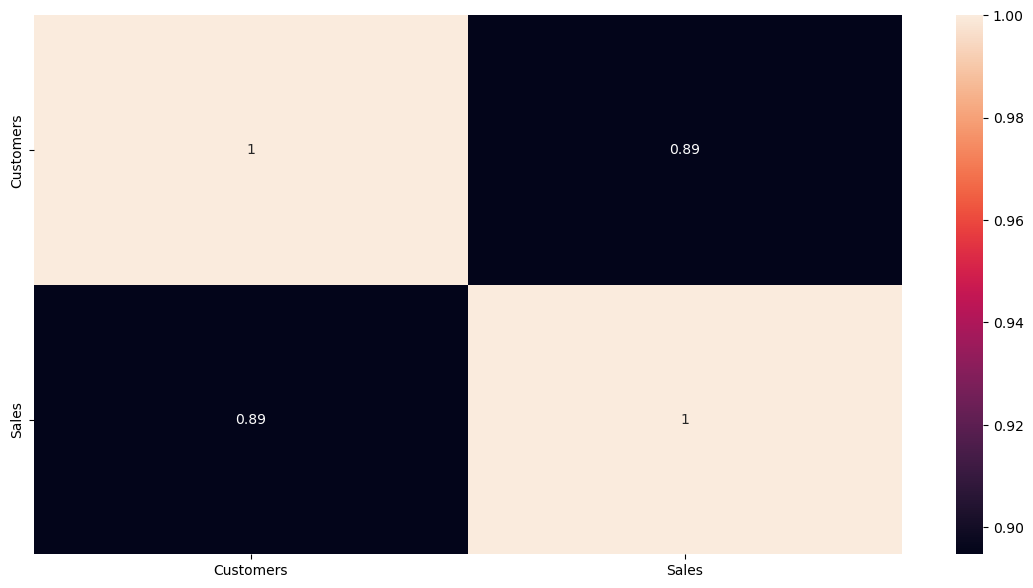

In [41]:
# plotting correlation heatmap 
plt.figure(figsize=(14,7))
sns.heatmap(data=correlation,annot=True)
plt.show()

# Impact of promotions 

2024-10-20 13:41:05,079 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:05,799 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


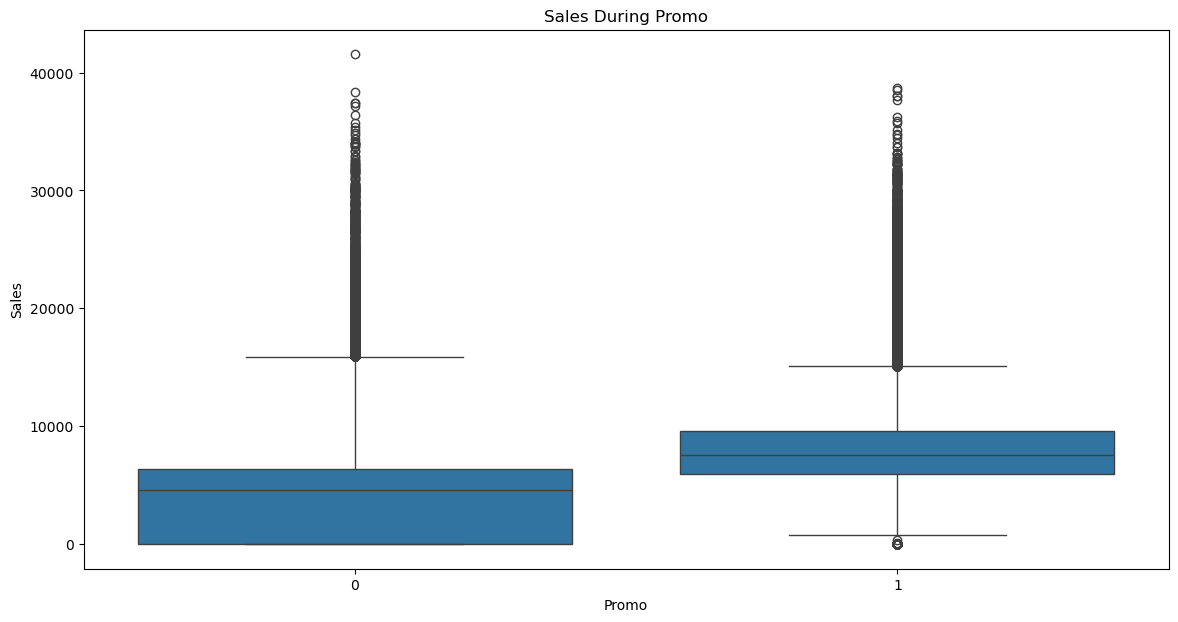

In [42]:
# Sales during promo 
plt.figure(figsize=(14,7))
sns.boxplot(data= train, x='Promo', y='Sales')
plt.title('Sales During Promo')
plt.show()

2024-10-20 13:41:07,153 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:07,851 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


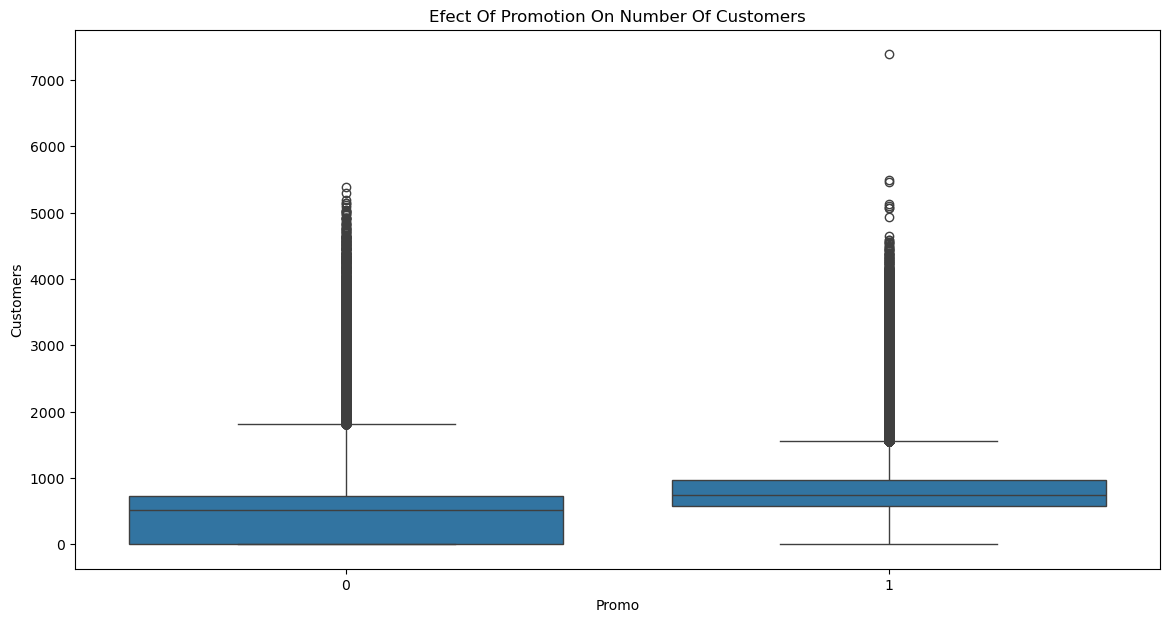

In [43]:
# Efect of promotions on number of customers 
plt.figure(figsize=(14,7))
sns.boxplot(data= train, x='Promo', y='Customers')
plt.title('Efect Of Promotion On Number Of Customers')
plt.show()

2024-10-20 13:41:09,229 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:09,990 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


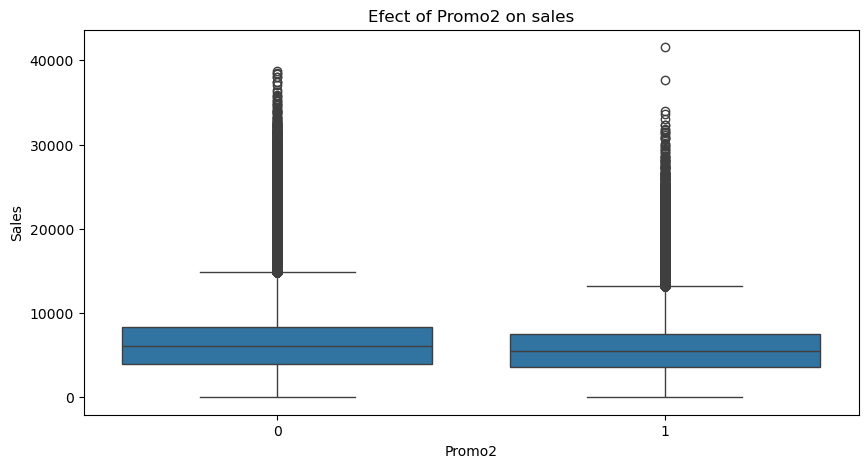

In [44]:
# Efect of Promo2 on Sales 
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='Promo2', y='Sales')
plt.title('Efect of Promo2 on sales')
plt.show()

2024-10-20 13:41:11,693 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:12,449 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


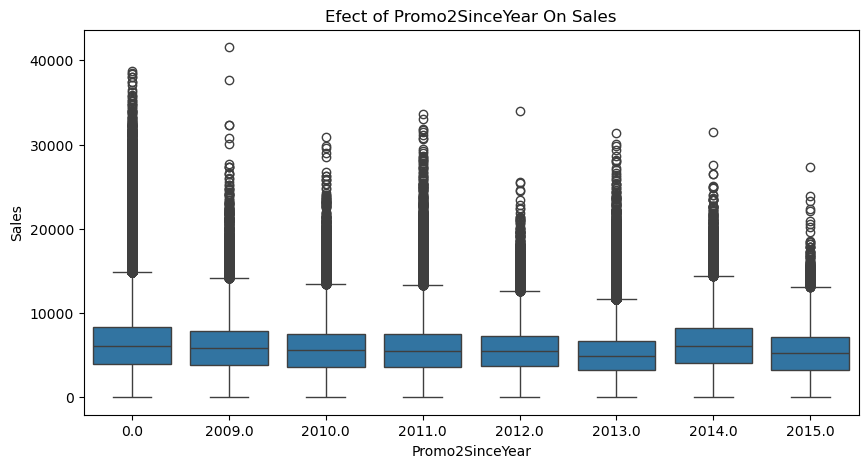

In [45]:
#Efect of Promo2SinceYear On Sales
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='Promo2SinceYear',y='Sales')
plt.title('Efect of Promo2SinceYear On Sales')
plt.show()

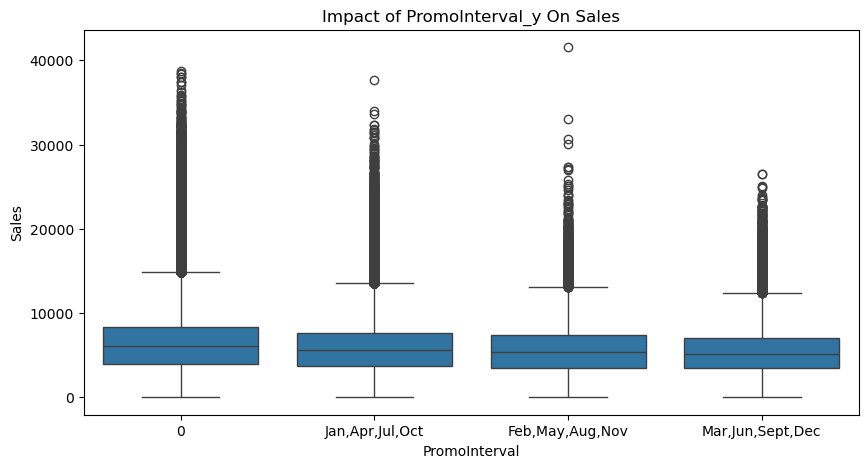

In [46]:
# Impact of PromoInterval_y On Sales 
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='PromoInterval', y='Sales')
plt.title('Impact of PromoInterval_y On Sales')
plt.show()

# Trends during store open and close time 

2024-10-20 13:41:16,329 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:17,034 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


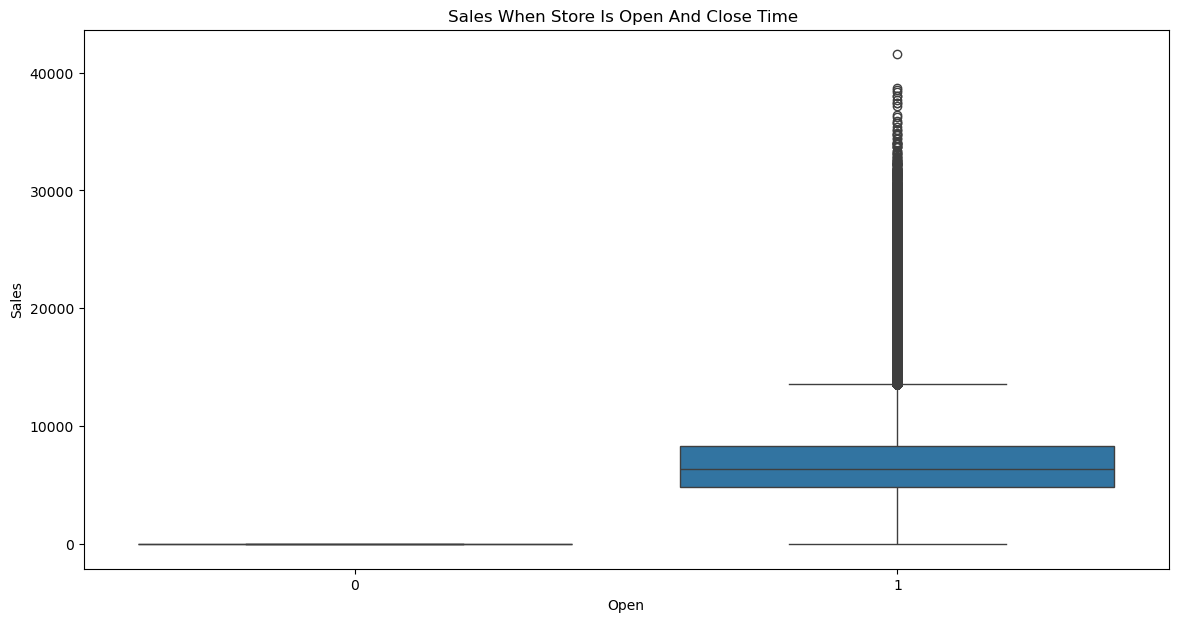

In [47]:
# Sales When Store Is Open And Close Time 
plt.figure(figsize=(14,7))
sns.boxplot(data=train, x='Open', y='Sales')
plt.title('Sales When Store Is Open And Close Time ')
plt.show()

2024-10-20 13:41:18,309 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:19,010 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


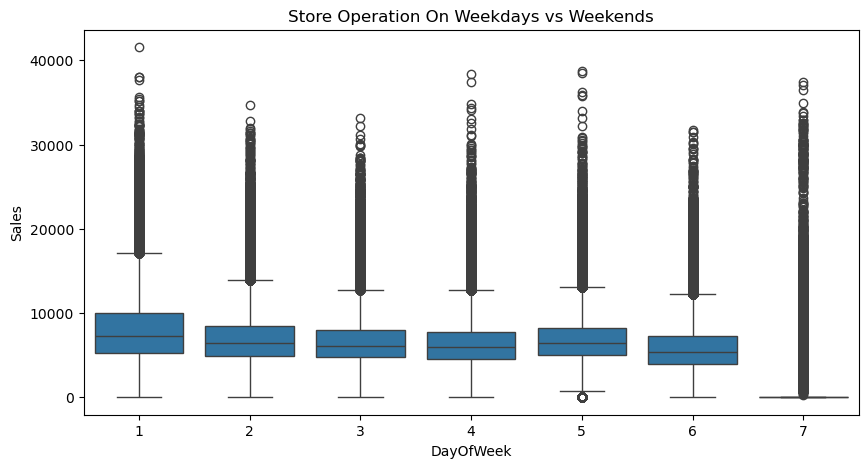

In [48]:
# Store Operation On Weekdays vs Weekends 
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='DayOfWeek', y='Sales')
plt.title('Store Operation On Weekdays vs Weekends')
plt.show()

In [49]:
train.iloc[0:5,8:23]

,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Day,week
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,7,7,31
1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,7,7,31
2,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,7,7,31
3,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7,7,7,31
4,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7,7,7,31


# Competitor diatance impact 

In [50]:
#logging info
logging.info('Analyzing impact of opening or reopening new competitors on stores')

2024-10-20 13:41:19,650 - INFO - Analyzing impact of opening or reopening new competitors on stores


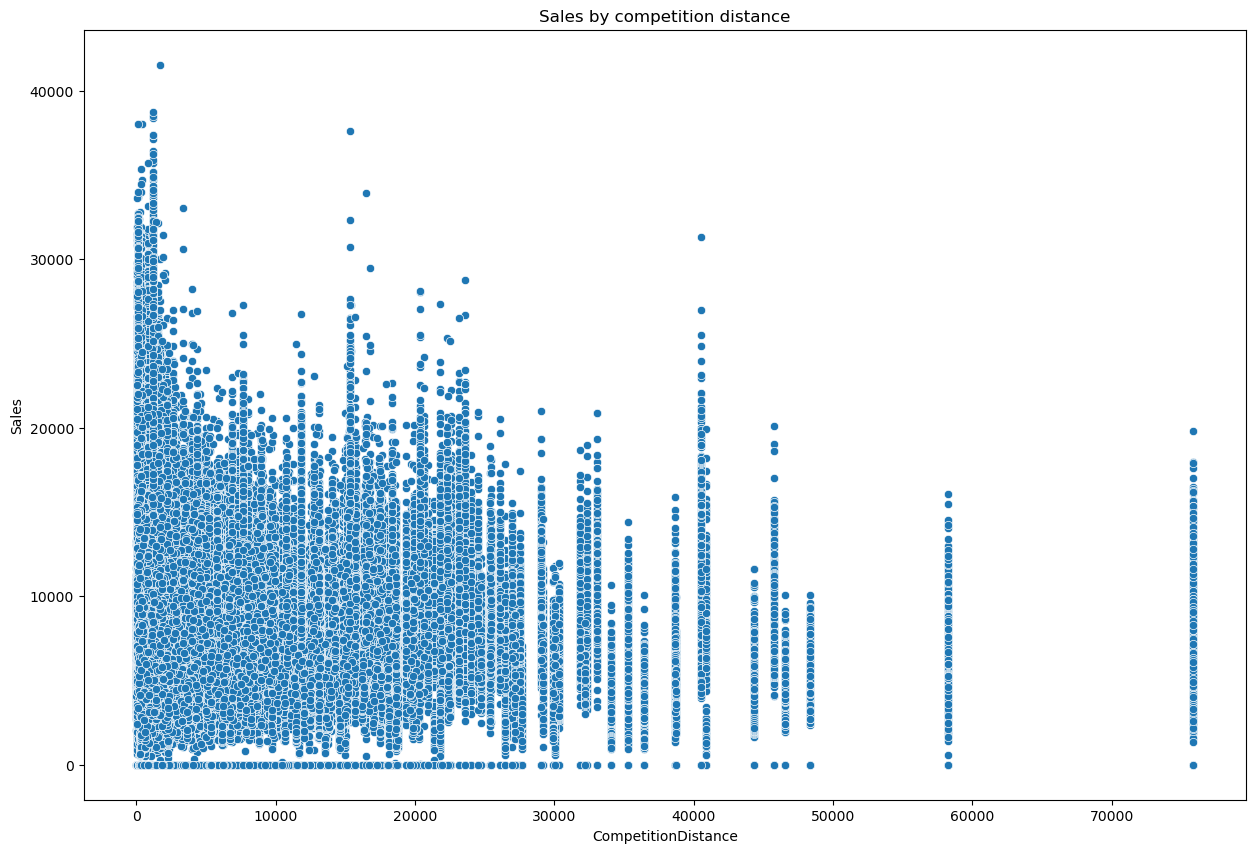

In [51]:
# Sales by competition distance 
plt.figure(figsize=(15,10))
sns.scatterplot(data=train, x='CompetitionDistance', y='Sales')
plt.title('Sales by competition distance')
plt.show()

2024-10-20 13:41:23,982 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:24,742 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


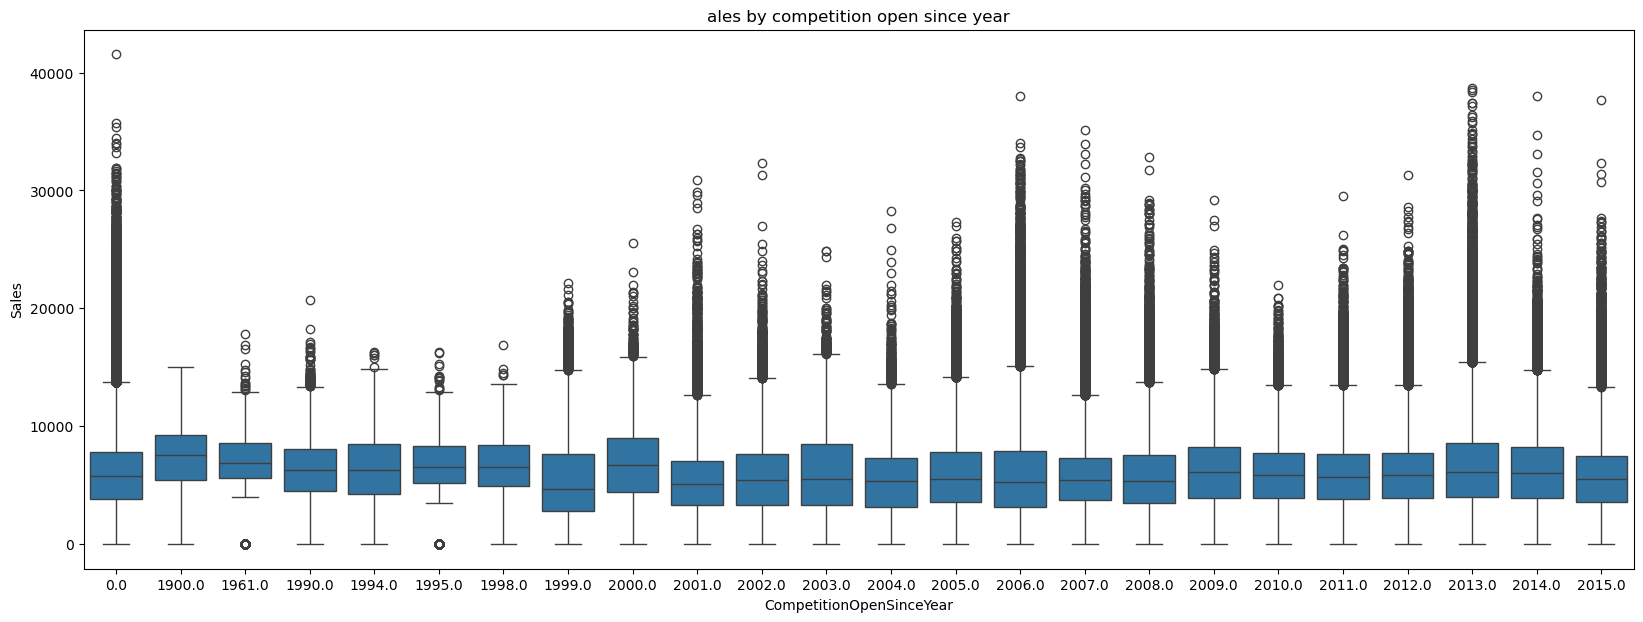

In [52]:
# sales by competition open since year
plt.figure(figsize=(20,7))
sns.boxplot(data=train, x='CompetitionOpenSinceYear', y='Sales')
plt.title('ales by competition open since year')
plt.show()

2024-10-20 13:41:26,549 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-20 13:41:27,279 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


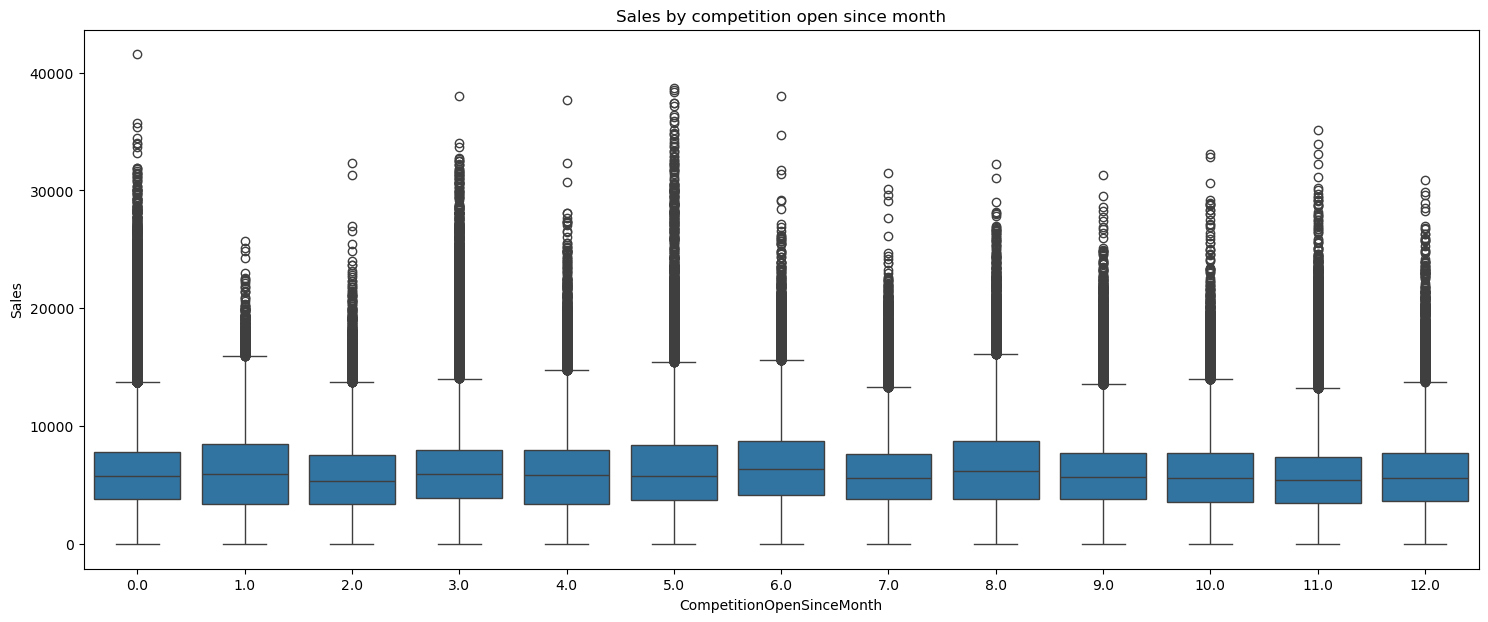

In [53]:
#Sales by competition open since month 
plt.figure(figsize=(18,7))
sns.boxplot(data=train, x='CompetitionOpenSinceMonth', y='Sales')
plt.title('Sales by competition open since month')
plt.show()

# Asstorement type impact 

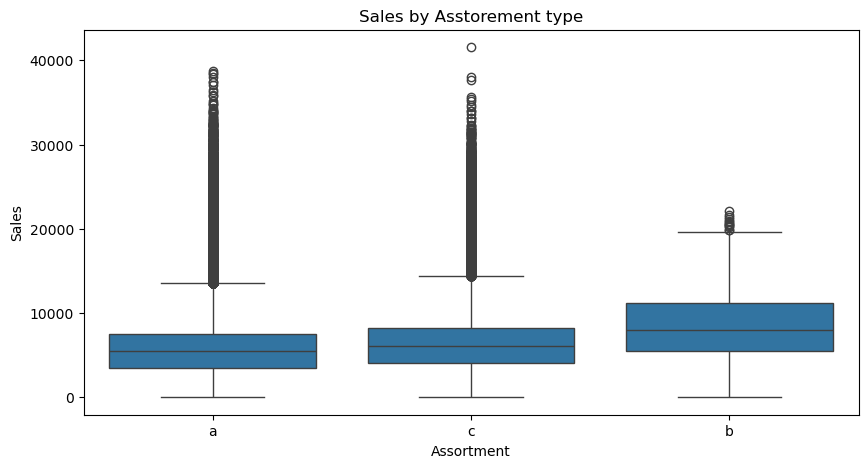

In [54]:
# Sales by Asstorement type  
plt.figure(figsize=(10,5))
sns.boxplot(data=train,x='Assortment', y='Sales')
plt.title('Sales by Asstorement type')
plt.show()

In [55]:
#Logging step 
logger.info('EDA Completed. Visualization Created succesfully')

2024-10-20 13:41:29,893 - INFO - EDA Completed. Visualization Created succesfully


In [56]:
train.iloc[0:5,8:30]

,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,Day,week
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,7,7,31
1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,7,7,31
2,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,7,7,31
3,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7,7,7,31
4,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,7,7,7,31


In [57]:
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


# Generate New Feature From Datetime Column 

In [58]:
logger.info('Extracting Features From Date Time Columns')

2024-10-20 13:41:30,067 - INFO - Extracting Features From Date Time Columns


In [59]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [60]:
# Extract New Feature  From The "Date" Column In The Train And Test Dataset 
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['Weekday'] = df['Date'].dt.weekday
    df['IsWeekend'] = df['Weekday'].isin([5, 6]).astype(int)
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

In [61]:
logger.info('Date Time Features Extracted')

2024-10-20 13:41:30,925 - INFO - Date Time Features Extracted


# Convert Non-Numeric Column To Numeric 

Handling categorical variables

In [62]:
logger.info('Handling categorical variables')

2024-10-20 13:41:30,936 - INFO - Handling categorical variables


In [63]:
# Columns to be one-hot encoded
columns_to_encode = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']

#One-hot encode the column in the traing data set 
train_encode  = pd.get_dummies(train, columns=columns_to_encode,dtype="int")

#One-hot encode the column in the test data set 
test_encode = pd.get_dummies(test, columns=columns_to_encode,dtype="int")

# Ensure both train and test have the same columns after one-hot encoding 
train_encode, test_encode = train_encode.align(test_encode, join='left',axis=1, fill_value=0)

In [64]:
print(train_encode.head())
print(test_encode.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  Assortment_c  \
0               1270.0                        9.0  ...             0   
1                570.0                       11.0  ...             0   
2              14130.0                       12.0  ...             0   
3                620.0                        9.0  ...             1   
4              29910.0                        4.0  ...             0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1               

In [65]:
logger.info("Categorical variables handled")

2024-10-20 13:41:32,603 - INFO - Categorical variables handled


# Scale the data

finally,we'll scale the data using the 'standardscaler' from 'sklearn'

In [66]:
# import some important module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
test_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Store                           41088 non-null  int64         
 1   DayOfWeek                       41088 non-null  int64         
 2   Date                            41088 non-null  datetime64[ns]
 3   Sales                           41088 non-null  int64         
 4   Customers                       41088 non-null  int64         
 5   Open                            41088 non-null  float64       
 6   Promo                           41088 non-null  int64         
 7   SchoolHoliday                   41088 non-null  int64         
 8   CompetitionDistance             41088 non-null  float64       
 9   CompetitionOpenSinceMonth       41088 non-null  float64       
 10  CompetitionOpenSinceYear        41088 non-null  float64       
 11  Pr

In [68]:
train_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 42 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

In [69]:
test_encode.drop(['Customers','Date','Sales'],axis=1,inplace=True)

In [70]:
# Randomly sample 40% of the data
train_encode = train_encode.sample(frac=0.4, random_state=42)

# Save the sampled dataset
train_encode.to_csv('sampled_dataset.csv', index=False)

In [71]:
logger.info('Extracting features and target variable')

2024-10-20 13:41:40,372 - INFO - Extracting features and target variable


In [72]:
# Extracting features and target variable
x = train_encode.drop(columns=['Sales', 'Customers', 'Date'])
y = train_encode['Sales']

In [73]:
logger.info('Scaling the data')

2024-10-20 13:41:40,432 - INFO - Scaling the data


In [74]:
# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
test_scaled = scaler.transform(test_encode)

In [75]:
logger.info('Data scaled')

2024-10-20 13:41:41,569 - INFO - Data scaled


In [76]:
logger.info('Splitting The Data into train and validation Sets')

2024-10-20 13:41:41,578 - INFO - Splitting The Data into train and validation Sets


In [77]:
# Spliting The Data 
x_train,x_test,y_train, y_test =train_test_split(x_scaled,y,test_size=0.2, random_state=42)

In [78]:
logger.info('Data Split Completed')

2024-10-20 13:41:42,069 - INFO - Data Split Completed


In [79]:
logger.info('Saving The Preprocessed Data ')

2024-10-20 13:41:42,083 - INFO - Saving The Preprocessed Data 


In [80]:
np.save('x_train.npy',x_train)
np.save('x_test.npy',x_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('test_scaled.npy', test_scaled)

In [81]:
logger.info('Preproessed Data Saved')

2024-10-20 13:41:42,305 - INFO - Preproessed Data Saved


# Building Models With Sklearn Pipelines

In [82]:
# Import some important modules
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
logger.info('Building the model pipeline')

2024-10-20 13:41:43,691 - INFO - Building the model pipeline


In [84]:
# Building the model pipeline 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',RandomForestRegressor(n_estimators=100,max_depth=20, random_state=42))
])

In [85]:
logger.info('Training the model')

2024-10-20 13:41:43,718 - INFO - Training the model


In [86]:
#Training the model 
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, random_state=42))])

In [87]:
logger.info('Model trained')

2024-10-20 13:48:15,999 - INFO - Model trained


In [88]:
logger.info('Evaluating the model')

2024-10-20 13:48:16,015 - INFO - Evaluating the model


In [89]:
# Evaluating the model 
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [90]:
mse

1281861.18813618

In [91]:
logger.info(f'Model Evaluation Completed with MSE: {mse}')

2024-10-20 13:48:20,189 - INFO - Model Evaluation Completed with MSE: 1281861.18813618


In [92]:
logger.info('Evaluating r2_score')

2024-10-20 13:48:20,199 - INFO - Evaluating r2_score


In [93]:
# Evavulate r2 score
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.9142980186105802


In [94]:
logger.info(f'Evaluation complete with r2_score: {r2_score}')

2024-10-20 13:48:20,229 - INFO - Evaluation complete with r2_score: 0.9142980186105802


# Select relevant columns
columns = ['month','Day','week','Store', 'SchoolHoliday', 'IsWeekend', 'Promo', 'CompetitionDistance', 'Year','Sales']
store_data = train_encode[columns]

In [95]:
store = train_encode[['month','Day','week','Store','SchoolHoliday','IsWeekend','Promo','CompetitionDistance','Year','Sales']]

In [96]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406884 entries, 76435 to 342588
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                406884 non-null  int32  
 1   Day                  406884 non-null  int32  
 2   week                 406884 non-null  UInt32 
 3   Store                406884 non-null  int64  
 4   SchoolHoliday        406884 non-null  int64  
 5   IsWeekend            406884 non-null  int32  
 6   Promo                406884 non-null  int64  
 7   CompetitionDistance  406884 non-null  float64
 8   Year                 406884 non-null  int32  
 9   Sales                406884 non-null  int64  
dtypes: UInt32(1), float64(1), int32(4), int64(4)
memory usage: 26.8 MB


In [97]:
x_new = store.iloc[:,:-1]
y_new = store['Sales']

In [98]:
# Split the Data
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size=0.2, random_state=42)

In [99]:
#Scaled the data
scaler_new = StandardScaler()
x_scaled_new = scaler.fit_transform(x_train_new)
test_scaled_new = scaler.transform(x_test_new)

In [100]:
# Build the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=42)
rf_model.fit(x_scaled_new, y_train_new)

# Predict on test data
y_pred_new = rf_model.predict(test_scaled_new)

# Saving the trained model 

In [101]:
# Import some module 
import joblib
from datetime import datetime

In [102]:
logger.info('Saving The Trained Model')

2024-10-20 13:50:57,087 - INFO - Saving The Trained Model


In [103]:
timestamp = datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
joblib.dump(pipeline, f'Rossmann_model_{timestamp}.pkl',compress=3)

['Rossmann_model_2024-10-20-13-50-57.pkl']

In [104]:
logger.info(f'Model Saved As Rossmann_model_{timestamp}.pkl')

2024-10-20 13:51:06,014 - INFO - Model Saved As Rossmann_model_2024-10-20-13-50-57.pkl


# Post prediction Analysys

In [105]:
logger.info('Etracting Feature Importance')

2024-10-20 13:51:06,025 - INFO - Etracting Feature Importance


In [106]:
# Feature Importance
importances = pipeline.named_steps['model'].feature_importances_ 
feature_names = x.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'Importance': importances})

# Optionally, you might want to sort the features by importance:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [107]:
logger.info('Feature Importance Extracted')

2024-10-20 13:51:06,153 - INFO - Feature Importance Extracted


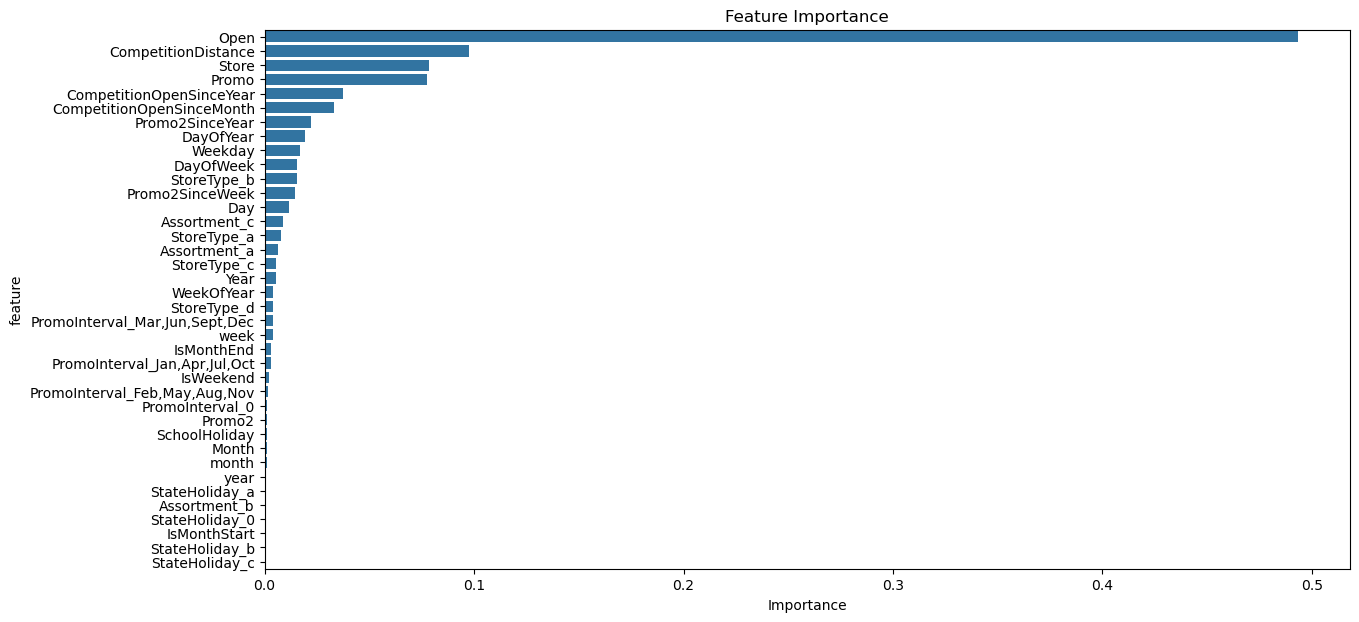

In [108]:
# Plotting Feature importance 
plt.figure(figsize=(14,7))
sns.barplot(data=feature_importance_df, x='Importance', y= 'feature')
plt.title('Feature Importance')
plt.show()

In [109]:
logger.info('Estimeting Confidence Intervals Prediction')

2024-10-20 13:51:08,712 - INFO - Estimeting Confidence Intervals Prediction


In [110]:
# Estimating confidence intervals
y_preds = [tree.predict(x_test) for tree in pipeline.named_steps['model'].estimators_]
y_preds = np.array(y_preds)
#Calculate mean and standard deviation of prediction
y_pred_mean = np.mean(y_preds, axis=0)
y_pred_std = np.std(y_preds, axis=0)
confidence_interval = 1.96 * y_pred_std

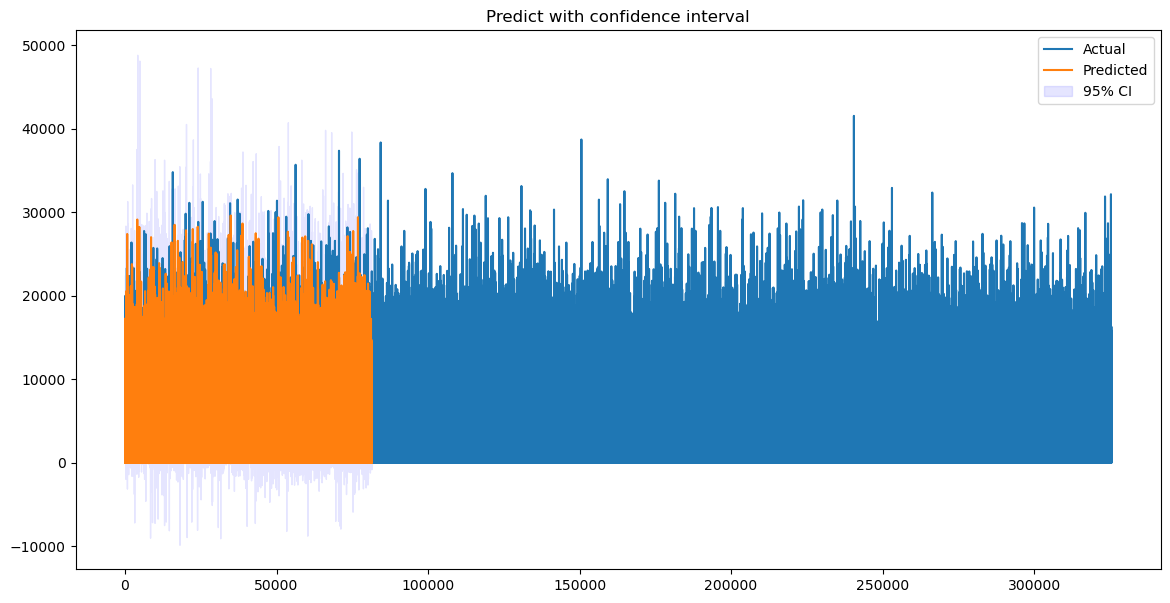

In [111]:
# Visualize a sample of the predictions with confidence intervals
plt.figure(figsize=(14,7))
plt.plot(y_train.values, label='Actual')
plt.plot(y_pred_mean, label='Predicted')
plt.fill_between(range(len(y_test)), y_pred_mean - confidence_interval, y_pred_mean + confidence_interval, color='b', alpha=0.1, label='95% CI')
plt.legend()
plt.title('Predict with confidence interval')
plt.show()

In [112]:
logger.info('Confidence interval estimated')

2024-10-20 13:51:16,392 - INFO - Confidence interval estimated


# Serialize Model

In [113]:
logger.info('Sirializing the model with timestamp')

2024-10-20 13:51:16,397 - INFO - Sirializing the model with timestamp


In [114]:
import joblib

In [115]:
# Generate the timestamp 
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Define the filename with timestamp
filename = f"model_{timestamp}.pkl"

In [116]:
# Serialize and compress the model with joblib
joblib.dump(pipeline, filename, compress=3)

print(f"Model serialized and saved as {filename}")

Model serialized and saved as model_20-10-2024-13-51-16-413466.pkl
